In [64]:
import os


In [65]:
os.chdir("../")

In [66]:
%pwd

'/home/bahl/Desktop/Talha'

In [67]:
%pwd

'/home/bahl/Desktop/Talha'

In [68]:
import pandas as pd

meta = pd.read_csv("data/symbols_valid_meta.csv")
a = pd.read_csv("data/A.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/symbols_valid_meta.csv'

In [ ]:
meta_clean = meta.copy()
a_clean = a.copy()

# **Data Preprocessing**
 
 symbols_valid_meta.csv




In [ ]:
def preprocess_meta(file_path):


    try:
        df = pd.read_csv(file_path)
        keep_cols = [
            "Symbol",
            "Security Name",
            "Market Category",
            "Listing Exchange",
            "ETF",
            "Round Lot Size",
            "Financial Status"
        ]

        
        valid_cols = []

        for col in keep_cols:
            if col in df.columns:
                valid_cols.append(col)

        df = df[valid_cols]


        print("Preprocessing complete")
        print(f"Columns kept: {list(df.columns)}")
        print(f"Rows: {len(df)}")

        return df

    except Exception as e:
        print(f"Error reading file: {e}")
        return None


if __name__ == "__main__":
    clean_df = preprocess_meta("data/symbols_valid_meta.csv")


Preprocessing complete
Columns kept: ['Symbol', 'Security Name', 'Market Category', 'Listing Exchange', 'ETF', 'Round Lot Size', 'Financial Status']
Rows: 8049


In [ ]:
clean_df.columns

Index(['Symbol', 'Security Name', 'Market Category', 'Listing Exchange', 'ETF',
       'Round Lot Size', 'Financial Status'],
      dtype='object')

In [ ]:
clean_df.head()

,Symbol,Security Name,Market Category,Listing Exchange,ETF,Round Lot Size,Financial Status
0,A,"Agilent Technologies, Inc. Common Stock",,N,N,100.0,NaN
1,AA,Alcoa Corporation Common Stock,,N,N,100.0,NaN
2,AAAU,Perth Mint Physical Gold ETF,,P,Y,100.0,NaN
3,AACG,ATA Creativity Global - American Depositary Sh...,G,Q,N,100.0,N
4,AADR,AdvisorShares Dorsey Wright ADR ETF,,P,Y,100.0,NaN


In [ ]:
clean_df['Market Category'] = clean_df['Market Category'].fillna('Other')
print(clean_df["Market Category"])

0        
1        
2        
3       G
4        
       ..
8044     
8045    Q
8046     
8047    G
8048    S
Name: Market Category, Length: 8049, dtype: object


### Unique Stock

In [ ]:
num_unique = clean_df["Symbol"].nunique()
name_of_stock = clean_df["Symbol"]
print("Number of unique stocks:", num_unique)
print(name_of_stock)


Number of unique stocks: 8049
0          A
1         AA
2       AAAU
3       AACG
4       AADR
        ... 
8044     ZUO
8045     ZVO
8046    ZYME
8047    ZYNE
8048    ZYXI
Name: Symbol, Length: 8049, dtype: object


### distribution of stocks

In [ ]:


exchange_list = clean_df['Listing Exchange'].value_counts()
print(exchange_list)


Listing Exchange
Q    3383
N    2520
P    1542
Z     351
A     253
Name: count, dtype: int64


### ETFs (Exchange-Traded Funds)

In [ ]:
etf_count = clean_df[clean_df['ETF'] == 'Y'].shape[0]
print("Number of ETFs:", etf_count)


Number of ETFs: 2165


## **Visualization**:

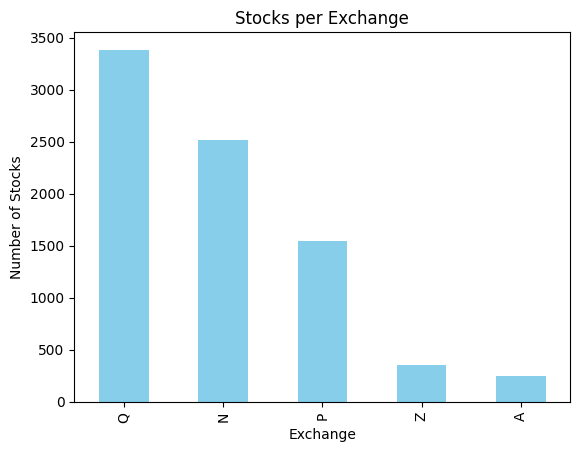

In [ ]:
from matplotlib import pyplot as plt


exchange_list.plot(kind="bar", color="skyblue")
plt.title("Stocks per Exchange")
plt.xlabel("Exchange")
plt.ylabel("Number of Stocks")
plt.show()


In [ ]:
category_distribution2 = clean_df["Market Category"]
labels = []
for i in category_distribution2:
    if i not in labels:
        labels.append(i)

labels[0]="others"
print(labels)

['others', 'G', 'Q', 'S']


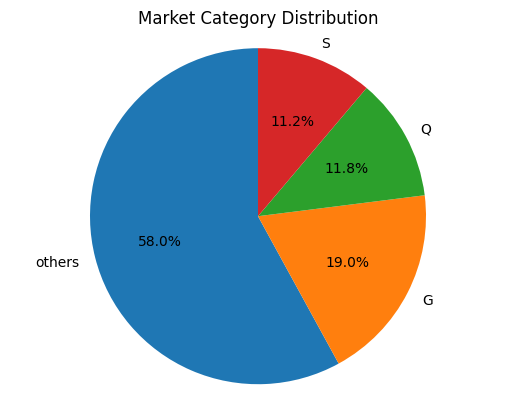

In [ ]:
category_distribution = clean_df['Market Category'].value_counts()

plt.pie(category_distribution,labels=labels,autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Market Category Distribution")
plt.show()


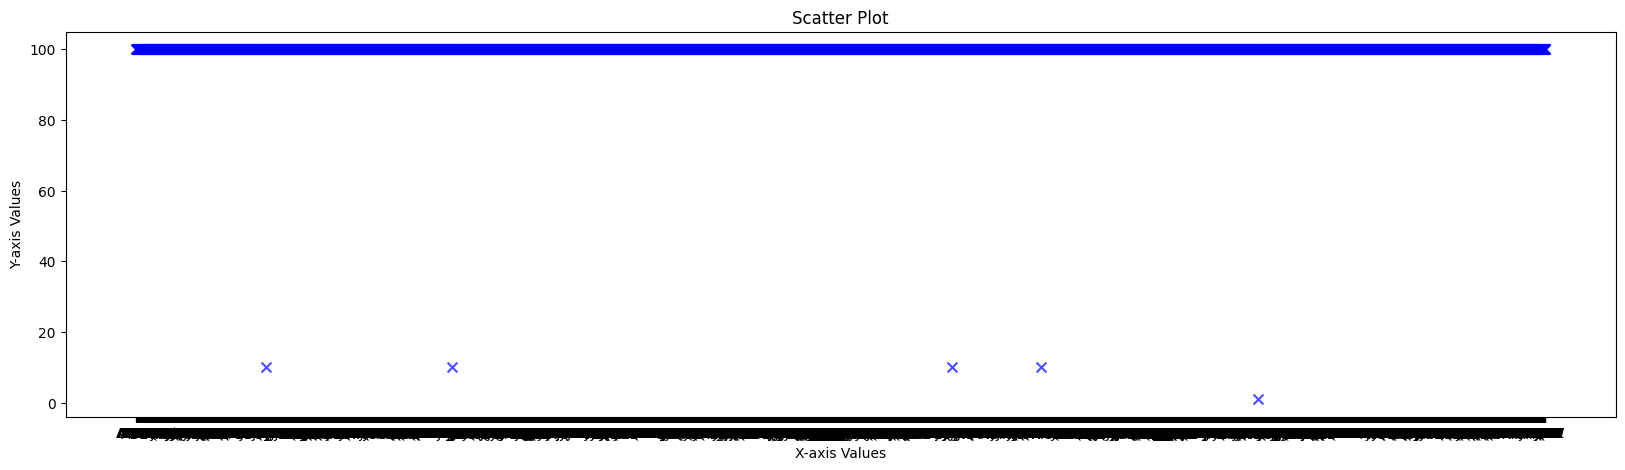

In [ ]:
y = clean_df['Round Lot Size']
x = clean_df['Symbol']

plt.figure(figsize=(20,5))
plt.scatter(x, y, color='blue', marker='x', s=50, alpha=0.7)


plt.xlabel("X-axis Values")
plt.ylabel("Y-axis Values")
plt.title("Scatter Plot")

plt.show()


## Advanced Analysis:

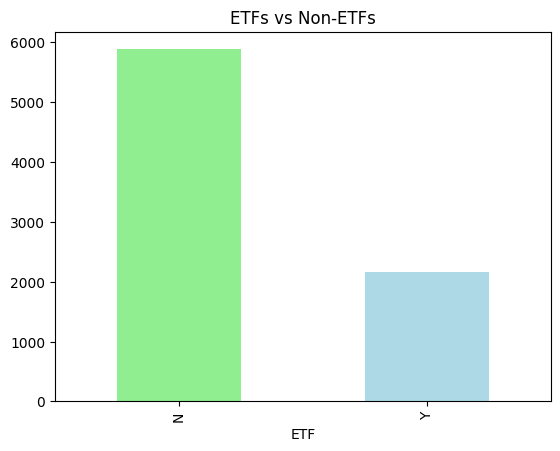

In [ ]:
etf = clean_df['ETF'].value_counts()
etf.plot(kind="bar", color=["lightgreen","lightblue"])
plt.title("ETFs vs Non-ETFs")
plt.show()


In [ ]:
top10 = clean_df.nlargest(10, 'Round Lot Size')[['Symbol','Round Lot Size']]
print(top10)


  Symbol  Round Lot Size
0      A           100.0
1     AA           100.0
2   AAAU           100.0
3   AACG           100.0
4   AADR           100.0
5    AAL           100.0
6   AAMC           100.0
7   AAME           100.0
8    AAN           100.0
9   AAOI           100.0


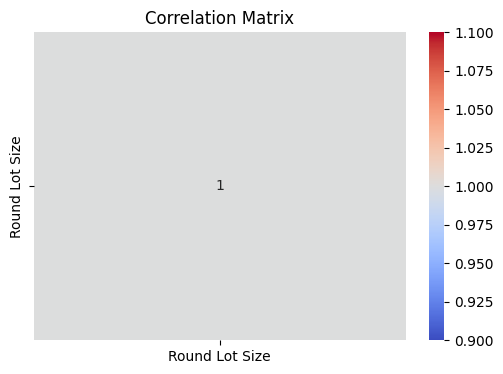

In [ ]:
import seaborn as sns

numeric_cols = clean_df.select_dtypes(include="number")
plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# **Data Preprocessing**
 
 a.csv




In [ ]:
a.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5124 non-null   object 
 1   Open       5124 non-null   float64
 2   High       5124 non-null   float64
 3   Low        5124 non-null   float64
 4   Close      5124 non-null   float64
 5   Adj Close  5124 non-null   float64
 6   Volume     5124 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.3+ KB


In [ ]:
a.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
summary_statistics = a.describe()
summary_statistics

,Open,High,Low,Close,Adj Close,Volume
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5.124000e+03
mean,34.090255,34.560553,33.629467,34.106245,31.778674,3.693250e+06
std,18.608831,18.834528,18.381718,18.611595,18.730529,2.481855e+06
min,7.653791,7.961373,7.510730,7.761087,6.674886,2.719000e+05
25%,21.101574,21.452074,20.785050,21.130186,18.790381,2.206475e+06
50%,27.328326,27.703863,27.010015,27.396280,24.714866,3.174050e+06
75%,41.500000,41.860001,41.130001,41.525204,39.203083,4.508075e+06
max,111.587982,115.879829,103.719597,113.733902,97.816307,6.254630e+07


In [ ]:
a['Date'] = pd.to_datetime(a['Date'])
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5124 non-null   datetime64[ns]
 1   Open       5124 non-null   float64       
 2   High       5124 non-null   float64       
 3   Low        5124 non-null   float64       
 4   Close      5124 non-null   float64       
 5   Adj Close  5124 non-null   float64       
 6   Volume     5124 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 280.3 KB


In [ ]:

a = a.sort_values(by='Date') 

a['Daily_Return'] = a['Close'].pct_change()
a[['Date','Close','Daily_Return']].head(10)


,Date,Close,Daily_Return
0,1999-11-18,31.473534,NaN
1,1999-11-19,28.880543,-0.082386
2,1999-11-22,31.473534,0.089783
3,1999-11-23,28.612303,-0.090909
4,1999-11-24,29.372318,0.026563
5,1999-11-26,29.461731,0.003044
6,1999-11-29,30.132332,0.022762
7,1999-11-30,30.177038,0.001484
8,1999-12-01,30.713520,0.017778
9,1999-12-02,31.562946,0.027656


## Visualization:

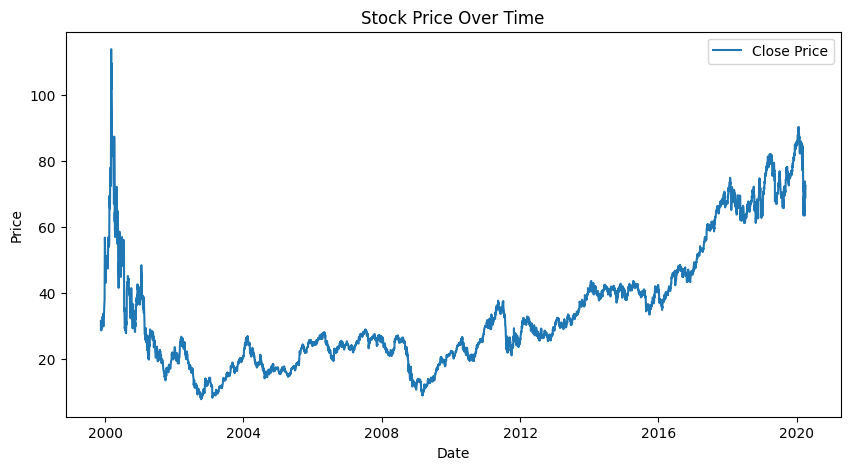

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(a['Date'], a['Close'], label="Close Price")
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()




# import plotly.graph_objects as go


# fig = go.Figure(data=[go.Candlestick(x=a['Date'],
#                 open=a['Open'],
#                 high=a['High'],
#                 low=a['Low'],
#                 close=a['Close'])])

# fig.show()


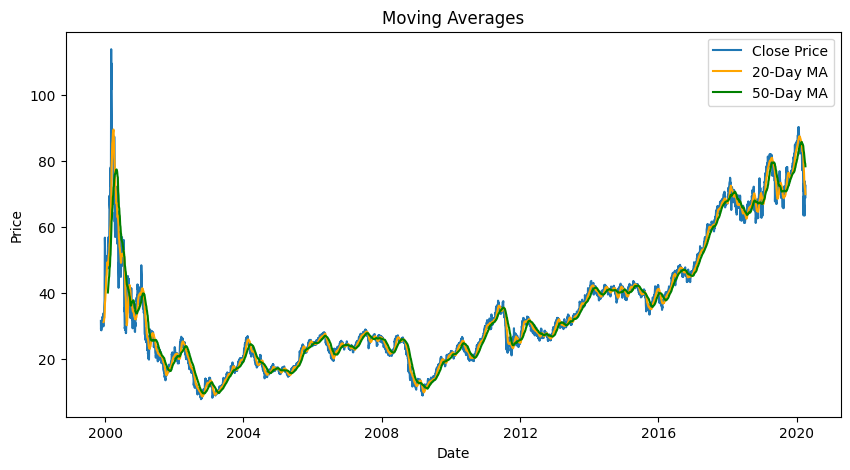

In [ ]:
a['MA20'] = a['Close'].rolling(window=20).mean()
a['MA50'] = a['Close'].rolling(window=50).mean()

plt.figure(figsize=(10,5))
plt.plot(a['Date'], a['Close'], label="Close Price")
plt.plot(a['Date'], a['MA20'], label="20-Day MA", color="orange")
plt.plot(a['Date'], a['MA50'], label="50-Day MA", color="green")
plt.title("Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


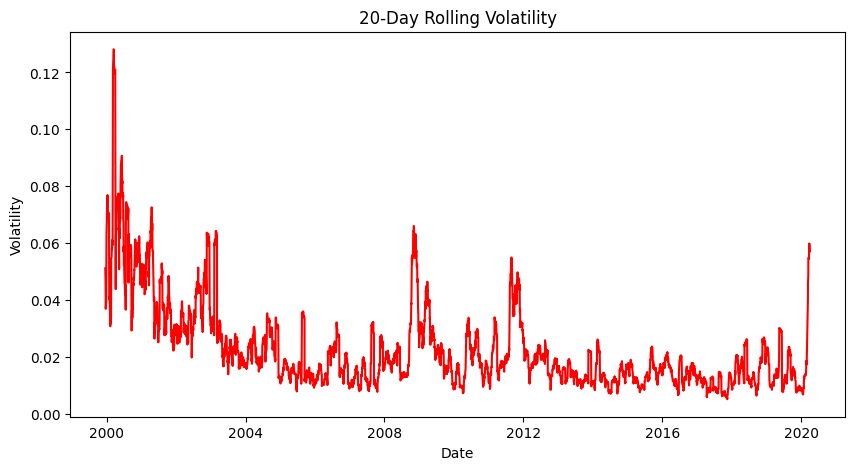

In [ ]:
a['Volatility'] = a['Daily_Return'].rolling(window=20).std()

plt.figure(figsize=(10,5))
plt.plot(a['Date'], a['Volatility'], color="red")
plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


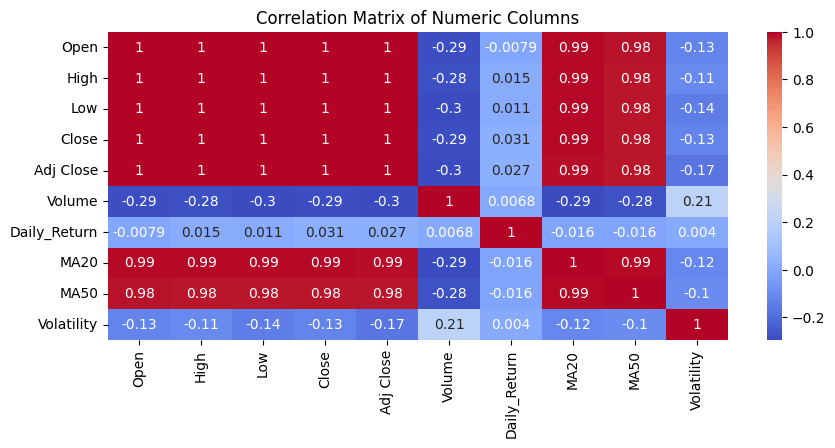

In [ ]:
numeric_cols = a.select_dtypes(include="number")

plt.figure(figsize=(10,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


In [ ]:
average_daily_return = a['Daily_Return'].mean()
print("Average Daily Return:", average_daily_return)


Average Daily Return: 0.0005295922366568872


In [ ]:
volatility = a['Daily_Return'].std()
print("Volatility (Std Dev of Daily Returns):", volatility)


Volatility (Std Dev of Daily Returns): 0.027630748306326336


In [ ]:
risk_free_rate = 0.01 / 252   
sharpe_ratio = (average_daily_return - risk_free_rate) / volatility
print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: 0.01773059822857486


In [ ]:
var_95 = a['Daily_Return'].quantile(0.05)
print("Value at Risk (95%):", var_95)


Value at Risk (95%): -0.040051029494604845


In [ ]:
portfolio_report = {
    "Average Daily Return": average_daily_return,
    "Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "VaR (95%)": var_95
}

print("Portfolio Performance Report")
for k, v in portfolio_report.items():
    print(f"{k}: {v:.4f}")


Portfolio Performance Report
Average Daily Return: 0.0005
Volatility: 0.0276
Sharpe Ratio: 0.0177
VaR (95%): -0.0401
